## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix
import os
import cv2
from torchvision.datasets import ImageFolder

import matplotlib.pyplot as plt # for plotting
import numpy as np # for transformation


import torch.nn as nn # basic building block for neural neteorks
import torch.nn.functional as F # import convolution functions like Relu
import torch.optim as optim # optimzer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Dataset path
dataset_path = '/content/drive/MyDrive/caltech101/dataset'


In [4]:
pwd


'/content'

In [5]:
#printing the folder using os library 
print(os.listdir(dataset_path))

['wheelchair', 'water_lilly', 'wrench', 'windsor_chair', 'tick', 'umbrella', 'trilobite', 'wild_cat', 'yin_yang', 'watch', 'stegosaurus', 'scorpion', 'sea_horse', 'sunflower', 'strawberry', 'soccer_ball', 'starfish', 'snoopy', 'stop_sign', 'stapler', 'rooster', 'saxophone', 'revolver', 'pizza', 'pyramid', 'rhino', 'pigeon', 'scissors', 'platypus', 'schooner', 'octopus', 'mayfly', 'metronome', 'nautilus', 'Motorbikes', 'menorah', 'pagoda', 'minaret', 'okapi', 'panda', 'lotus', 'kangaroo', 'Leopards', 'ketch', 'laptop', 'joshua_tree', 'lamp', 'lobster', 'llama', 'mandolin', 'gerenuk', 'grand_piano', 'ibis', 'helicopter', 'hedgehog', 'headphone', 'garfield', 'inline_skate', 'gramophone', 'hawksbill', 'elephant', 'ferry', 'flamingo_head', 'Faces', 'emu', 'Faces_easy', 'electric_guitar', 'flamingo', 'euphonium', 'ewer', 'crab', 'cougar_face', 'dalmatian', 'dragonfly', 'dollar_bill', 'crayfish', 'dolphin', 'crocodile_head', 'crocodile', 'cup', 'ceiling_fan', 'chandelier', 'cellphone', 'couga

In [6]:
# no of classes
print(len(os.listdir(dataset_path)))

102


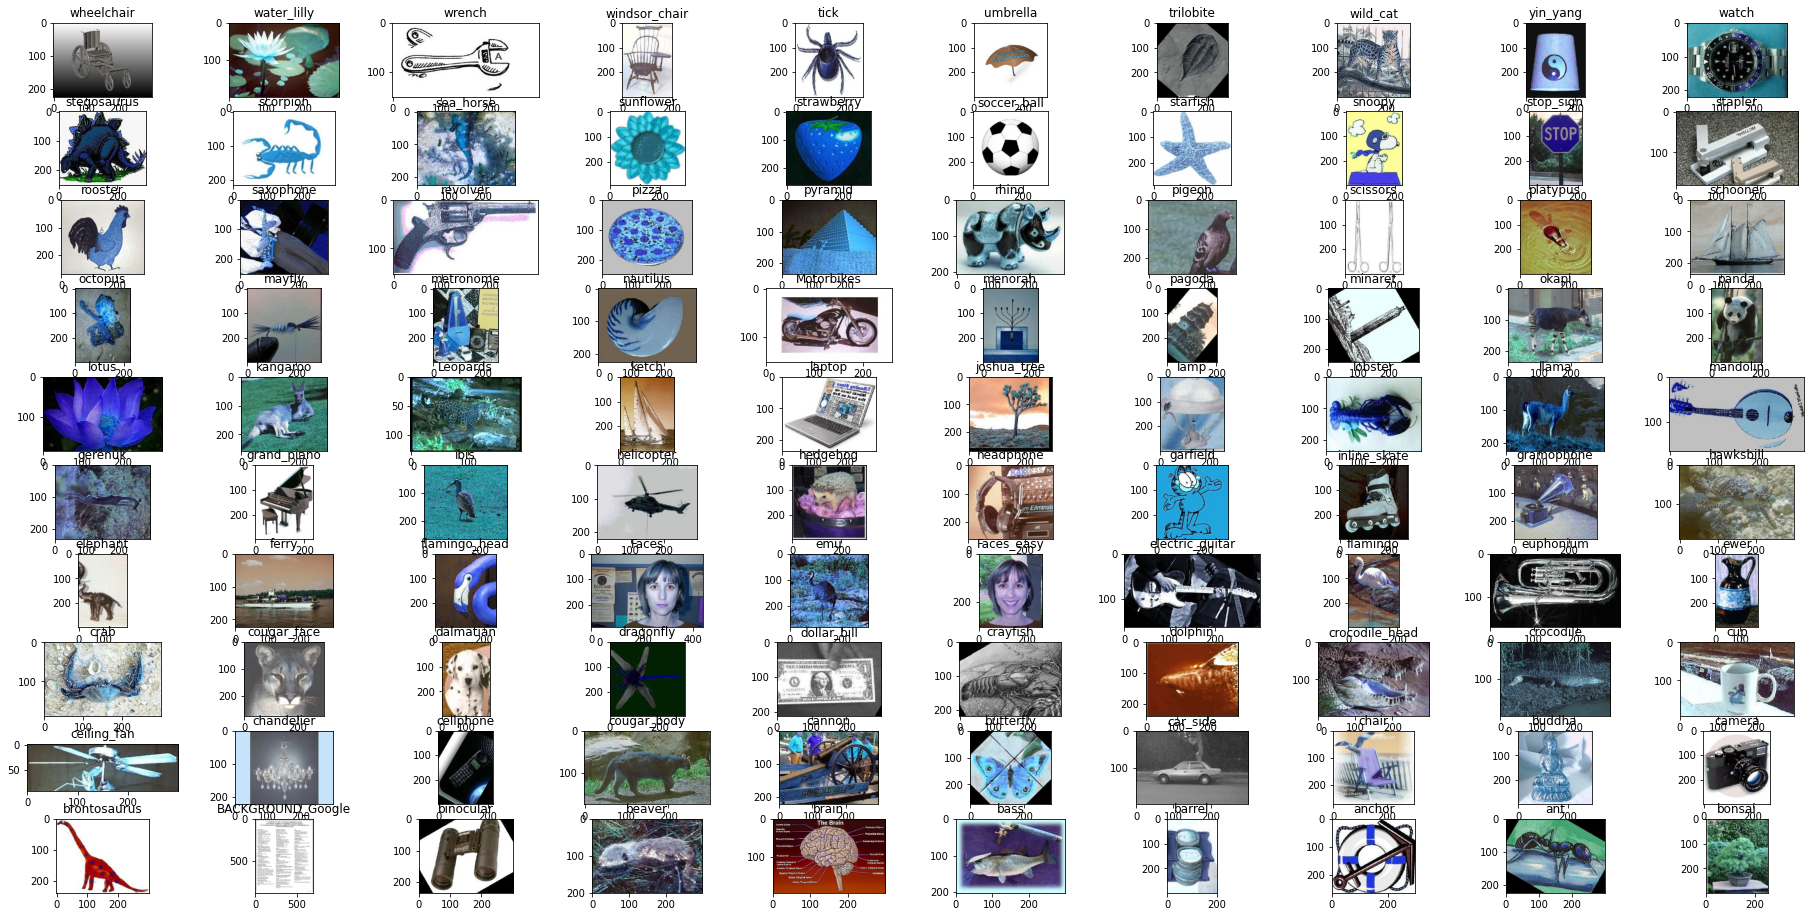

In [7]:
#Reading image from each class folder and displaying it
#I have used os library(operating system) to list all the directory and then reading one image from each folder class
#I then displayed the image 
i=1
plt.figure(figsize=(32, 16)) 
for folder in os.listdir(dataset_path):
  for img in os.listdir(os.path.join(dataset_path,folder)):
    img_path=os.path.join(os.path.join(dataset_path,folder),img)
    image=cv2.imread(img_path)
    plt.subplot(10,10,i)
    plt.imshow(image)
    plt.title(folder)
    i=i+1
    break
  if i==101:
    break

In [8]:
#Checking for the gpu availability
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [9]:
# ImageFolder class is a part of the. torchvision. torchvision library's. datasets. datasets module
# Responsible for loading images from train and val folders into a PyTorch dataset.
dataset = ImageFolder(dataset_path,transform = transforms.Compose([
    transforms.Resize((128,128)),transforms.ToTensor()
]))

In [10]:
#checking the image dimension and total no of dataset images
img, label = dataset[0]
print(img.shape,label)
print(len(dataset))


torch.Size([3, 128, 128]) 0
9144


In [11]:
#printing the classes
print("Following are class : \n",dataset.classes)

Following are class : 
 ['BACKGROUND_Google', 'Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'accordion', 'airplanes', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion', '

Label : BACKGROUND_Google


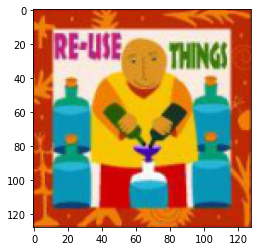

In [12]:
#Image displaying
def img_display(img,label):
    print(f"Label : {dataset.classes[label]}")
    plt.imshow(img.permute(1,2,0))

#display the first image in the dataset
img_display(*dataset[0])

In [13]:
#defining the batch size and validation size
#dividing the whole data into train and validation set
#I have used 2000 images for validation/test and the remaining ones for training
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

batch_size = 128
val_size = 2000
train_size = len(dataset) - val_size 

train_data,val_data = random_split(dataset,[train_size,val_size])
print(f"Length of Train Data : {len(train_data)}")
print(f"Length of Validation Data : {len(val_data)}")

#load the train and validation into batches.
train_dataset = DataLoader(train_data, batch_size, shuffle = True, pin_memory = True)
val_dataset = DataLoader(val_data, batch_size,  pin_memory = True)

Length of Train Data : 7144
Length of Validation Data : 2000


In [14]:
batch = next(iter(train_dataset))
images, labels = batch
print(type(images), type(labels))
print(images.shape, labels.shape)

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([128, 3, 128, 128]) torch.Size([128])


In [15]:
labels.shape

torch.Size([128])

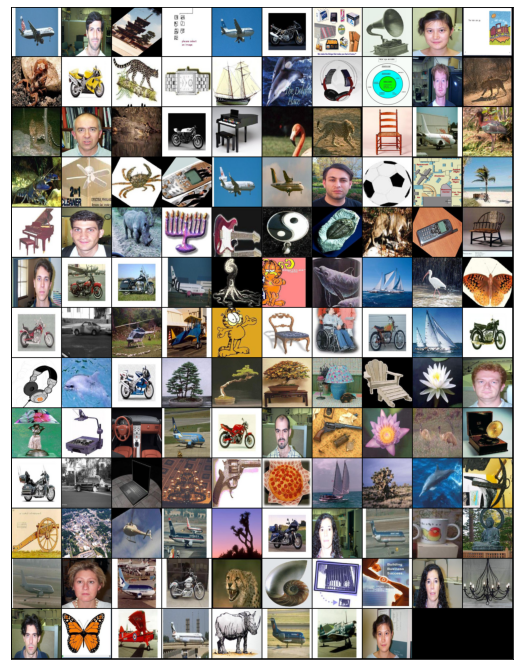

In [16]:

from torchvision.utils import make_grid
import matplotlib.pyplot as plt
#Showing one batch of the training data
def show_batch(data):
    """Plot images grid of single batch"""
    for images, labels in data:
        fig,ax = plt.subplots(figsize = (16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=10).permute(1,2,0))
        break
        
show_batch(train_dataset)

In [17]:
#defining the neural network architecture for the task
# have used 4 convolution layer, the first layers has 32 filter, 2nd has 64, 3rd has 128 and 4th has 64
#Then i flatten the layer and add three fully connected layer for the classification
#at the last used the output layer with has output aize of 102 (because we have 102 classes)
# Create a neural net class
class Net(nn.Module):
    
    
    # Defining the Constructor
    def __init__(self, num_classes=3):
        super(Net, self).__init__()
        
        # In the init function, we define each layer we will use in our model
        
        # Our images are RGB, so we have input channels = 3. 
        # We will apply 32 filters in the first convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        
        # A second convolutional layer takes 32 input channels, and generates 64 outputs
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        
        # A third convolutional layer takes 64 input channels, and generates 128 outputs
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        # A third convolutional layer takes 128 input channels, and generates 64 outputs
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, stride=1, padding=1)
        # We in the end apply max pooling with a kernel size of 2
        self.pool = nn.MaxPool2d(kernel_size=2)
        
        # A drop layer deletes 20% of the features to help prevent overfitting
        self.drop = nn.Dropout2d(p=0.2)
        
        # Our 128x128 image tensors will be pooled twice with a kernel size of 2. 128/2/2/2/2 is 8.
        # This means that our feature tensors are now 32 x 32, and we've generated 24 of them
        
        # We need to flatten these in order to feed them to a fully-connected layer
        self.fc1 = nn.Linear(in_features=64 * 8 * 8, out_features=1024)
        self.fc2 = nn.Linear(in_features=1024, out_features=256)
        self.fc3 = nn.Linear(in_features=256, out_features=num_classes)

    def forward(self, x):
        # In the forward function, pass the data through the layers we defined in the init function
        
        # Use a ReLU activation function after layer 1 (convolution 1 and pool)
        x = F.relu(self.pool(self.conv1(x))) 
        
        # Use a ReLU activation function after layer 2
        x = F.relu(self.pool(self.conv2(x)))  
        
        # Use a ReLU activation function after layer 2
        x = F.relu(self.pool(self.conv3(x)))

        # Use a ReLU activation function after layer 2
        x = F.relu(self.pool(self.conv4(x)))

        # Select some features to drop to prevent overfitting (only drop during training)
        x = F.dropout(self.drop(x), training=self.training)
        
        # Flatten
        x = x.view(-1, 64 *8 * 8)
        # Feed to fully-connected layer to predict class
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        # Return class probabilities via a log_softmax function 
        return torch.log_softmax(x, dim=1)
    
device = "cpu"
if (torch.cuda.is_available()):
    # if GPU available, use cuda (on a cpu, training will take a considerable length of time!)
    device = "cuda"

# Create an instance of the model class and allocate it to the device
model = Net(num_classes=102).to(device)

print(model)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop): Dropout2d(p=0.2, inplace=False)
  (fc1): Linear(in_features=4096, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=102, bias=True)
)


In [22]:
batch_count=128
# defining the train process from training the data to calculting traing loss
def train(model, device, train_loader, optimizer, epoch):
    # Set the model to training mode
    model.train()
    train_loss = 0
    correct = 0
    # Process the images in batches
    for batch_idx, (data, target) in enumerate(train_loader):
        # Use the CPU or GPU as appropriate  Recall that GPU is optimized for the operations we are dealing with
        data, target = data.to(device), target.to(device)   
        # Reset the optimizer
        optimizer.zero_grad()
        # Push the data forward through the model layers
        output = model(data)
        # Get the loss
        loss = loss_criteria(output, target)
        # Keep a running total
        train_loss += loss.item()
        # Calculate the accuracy for this batch
        _, predicted = torch.max(output.data, 1)
        correct += torch.sum(target==predicted).item()
        
        # Backpropagate
        loss.backward()
        optimizer.step()     
        # # Print metrics so we see some progress
        # print('\tTraining batch {} Loss: {:.6f}'.format(batch_idx + 1, loss.item()))
    accuracy=100. * correct / len(train_loader.dataset)       
    # return average loss for the epoch
    avg_loss = train_loss / (batch_idx+1)
    return avg_loss,accuracy

In [23]:
#Testing Module which is been called after training the model for the purpose of validation
#Loss is been calculated and accuracy score is also displayed
def test(model, device, test_loader):
    # Switch the model to evaluation mode (so we don't backpropagate or drop)
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        batch_count = 0
        for data, target in test_loader:
            batch_count += 1
            data, target = data.to(device), target.to(device)
            
            # Get the predicted classes for this batch
            output = model(data)
            
            # Calculate the loss for this batch
            test_loss += loss_criteria(output, target).item()
            
            # Calculate the accuracy for this batch
            _, predicted = torch.max(output.data, 1)
            correct += torch.sum(target==predicted).item()
    accuracy=100. * correct / len(test_loader.dataset)
    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss / batch_count
    # return average loss for the epoch
    return avg_loss,accuracy

In [24]:
#defining the no of epoch and calling the test and train function and saving every epoch result to a list and later on will be used to draw graphs
# Use an "Adam" optimizer to adjust weights
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Specify the loss criteria
loss_criteria = nn.CrossEntropyLoss()

# Track metrics in these arrays
epoch_nums = []
training_loss = []
training_acc = []
validation_loss = []
validation_acc = []
# Train over 10 epochs (We restrict to 10 for time issues)
epochs = 2
print('Training on', device)
for epoch in range(1, epochs + 1):
        train_loss,train_accuracy = train(model, device, train_dataset, optimizer, epoch)
        test_loss,test_accuracy = test(model, device,val_dataset )
        print('epoch:{} \ttraining loss: {:.6f}, training Accuracy: ({:.0f}%) validation loss: {:.6f}, validation Accuracy: ({:.0f}%) '.format(
        epoch,train_loss,train_accuracy, test_loss,test_accuracy ))
        epoch_nums.append(epoch)
        training_loss.append(train_loss)
        training_acc.append(train_accuracy)
        validation_acc.append(test_accuracy)
        validation_loss.append(test_loss)

Training on cuda
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
epoch: 1 training loss: 4.031233, training Accuracy: (17%)	 validation loss: 3.561342, validation Accuracy: (26%) 
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
epoch: 2 training loss: 3.276714, training Accuracy: (30%)	 validation loss: 3.024776, validation Accuracy: (34%) 


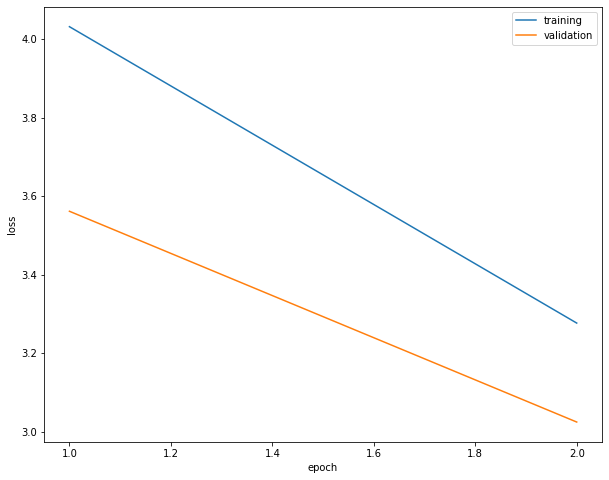

In [25]:
#Plotting the loss graph of both training and validation, the blue line represent the training loss graph with every epoch
#and the yellow represent the validation
plt.figure(figsize=(10,8))
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

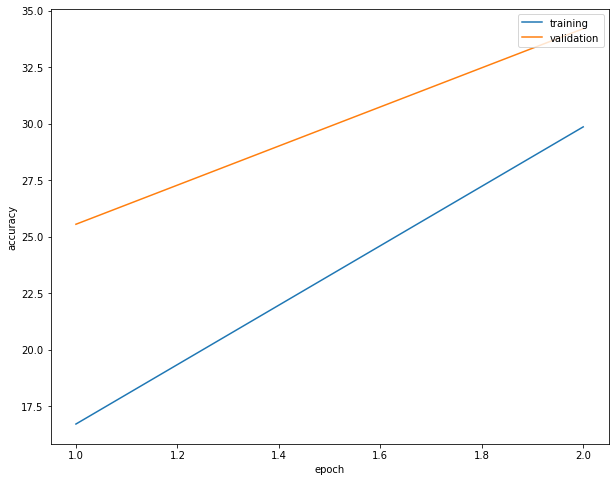

In [26]:
#and the yellow represent the validation
plt.figure(figsize=(10,8))
plt.plot(epoch_nums, training_acc)
plt.plot(epoch_nums, validation_acc)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
gggg